## **Project Overview**



The English Premier League is one of the world's most-watched soccer leagues, with an estimated audience of 12 million people per game.
With the substantial financial benefits, all significant teams of EPL are interested in Analytics and AI. Regarding sports analytics, machine learning and artificial intelligence (AI) have become extremely popular. The sports entertainment sector and the relevant stakeholders extensively use sophisticated algorithms to improve earnings and reduce business risk associated with selecting or betting on the wrong players.


<br>

![image](https://cdn.pixabay.com/photo/2016/04/15/20/28/football-1331838__340.jpg)

<br>


Regression is one of the foundational techniques in Machine Learning. As one of the most well-understood algorithms, linear regression plays a vital role in solving real-life problems.
In this project, we wish to use Linear Regression to predict the scores of EPL soccer players and What factors drive player performance in the EPL, and can we predict player scores to optimize transfer investments?".


#### Importing Important Libraries and Packages

In [3]:

# Data manipulation
import pandas as pd                    # For working with dataframes (like Excel on steroids)
import numpy as np                     # For numerical operations and arrays

# Visualization
import matplotlib.pyplot as plt        # Basic plotting library
import seaborn as sns                  # Beautiful statistical visualizations

# Statistical modeling
import statsmodels.api as sm           # For detailed regression analysis


# Machine learning (sklearn)
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso,ElasticNet, RidgeCV,LassoCV,ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Statistical tests
from scipy import stats

# Utilities
import warnings
warnings.filterwarnings('ignore')      # Suppress warning messages for cleaner output

# Display settings for better output
pd.set_option('display.max_columns', None)        # Show all columns
pd.set_option('display.width', None)              # Don't wrap text
pd.set_option('display.float_format', '{:.4f}'.format)  # 4 decimal places

# Plot styling
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11



In [4]:
#Loading the dataset

soccer_df = pd.read_csv('EPL_Soccer_MLR_LR.csv')

# Basic information
print(f"\n Dataset Shape: {soccer_df.shape}")
print(f"   - Rows (observations): {soccer_df.shape[0]}")
print(f"   - Columns (features): {soccer_df.shape[1]}")

# Display column names
print(f"\n Column Names:")
for i, col in enumerate(soccer_df.columns, 1):
    print(f"   {i:2d}. {col}")

# Display first few rows
print(f"\n First 5 Rows of Data:")
print(soccer_df.head())

# Data types
print(f"\n Data Types:")
print(soccer_df.dtypes)

# Basic statistics
print(f" Basic Statistics:")
print(soccer_df.describe())

# Missing values
print(f" Missing Values:")
missing = soccer_df.isnull().sum()
missing_pct = (missing / len(soccer_df) * 100).round(2)
missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing Count': missing.values,
    'Percentage': missing_pct.values
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) > 0:
    print(missing_df.to_string(index=False))
else:
    print("    No missing values detected!")


 Dataset Shape: (202, 13)
   - Rows (observations): 202
   - Columns (features): 13

 Column Names:
    1. PlayerName
    2. Club
    3. DistanceCovered(InKms)
    4. Goals
    5. MinutestoGoalRatio
    6. ShotsPerGame
    7. AgentCharges
    8. BMI
    9. Cost
   10. PreviousClubCost
   11. Height
   12. Weight
   13. Score

 First 5 Rows of Data:
                       PlayerName Club  DistanceCovered(InKms)  Goals  \
0         Braund, Mr. Owen Harris  MUN                  3.9600 7.5000   
1        Allen, Mr. William Henry  MUN                  4.4100 8.3000   
2                Moran, Mr. James  MUN                  4.1400 5.0000   
3         McCarthy, Mr. Timothy J  MUN                  4.1100 5.3000   
4  Palsson, Master. Gosta Leonard  MUN                  4.4500 6.8000   

   MinutestoGoalRatio  ShotsPerGame  AgentCharges     BMI     Cost  \
0             37.5000       12.3000            60 20.5600 109.1000   
1             38.2000       12.7000            68 20.6700 102.8000   

#### Exploratory Data Analysis
Visualize and understand the trends in the data


--------------------------------------------------------------------------------
TARGET VARIABLE ANALYSIS - Understanding 'Score'
--------------------------------------------------------------------------------


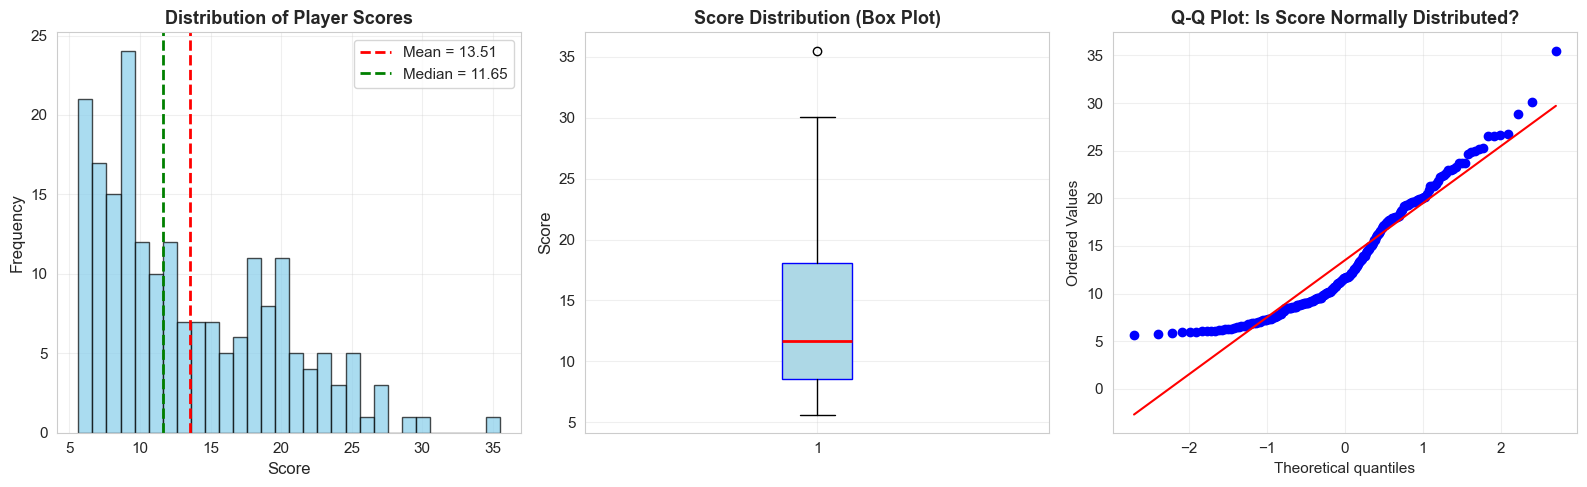

In [6]:
print("\n" + "-"*80)
print("TARGET VARIABLE ANALYSIS - Understanding 'Score'")
print("-"*80)

# Create figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# 1. Histogram - Distribution of Scores
axes[0].hist(soccer_df['Score'], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
axes[0].axvline(soccer_df['Score'].mean(), color='red', linestyle='--', 
                linewidth=2, label=f'Mean = {soccer_df["Score"].mean():.2f}')
axes[0].axvline(soccer_df['Score'].median(), color='green', linestyle='--', 
                linewidth=2, label=f'Median = {soccer_df["Score"].median():.2f}')
axes[0].set_xlabel('Score', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Player Scores', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2. Box Plot - Spread and outliers
axes[1].boxplot(soccer_df['Score'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='blue'),
                medianprops=dict(color='red', linewidth=2))
axes[1].set_ylabel('Score', fontsize=12)
axes[1].set_title('Score Distribution (Box Plot)', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# 3. Q-Q Plot - Check normality
stats.probplot(soccer_df['Score'], dist="norm", plot=axes[2])
axes[2].set_title('Q-Q Plot: Is Score Normally Distributed?', fontsize=13, fontweight='bold')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


--------------------------------------------------------------------------------
CATEGORICAL ANALYSIS - Club Distribution
--------------------------------------------------------------------------------

 Players per Club:
Club
CHE    78
LIV    65
MUN    59
Name: count, dtype: int64


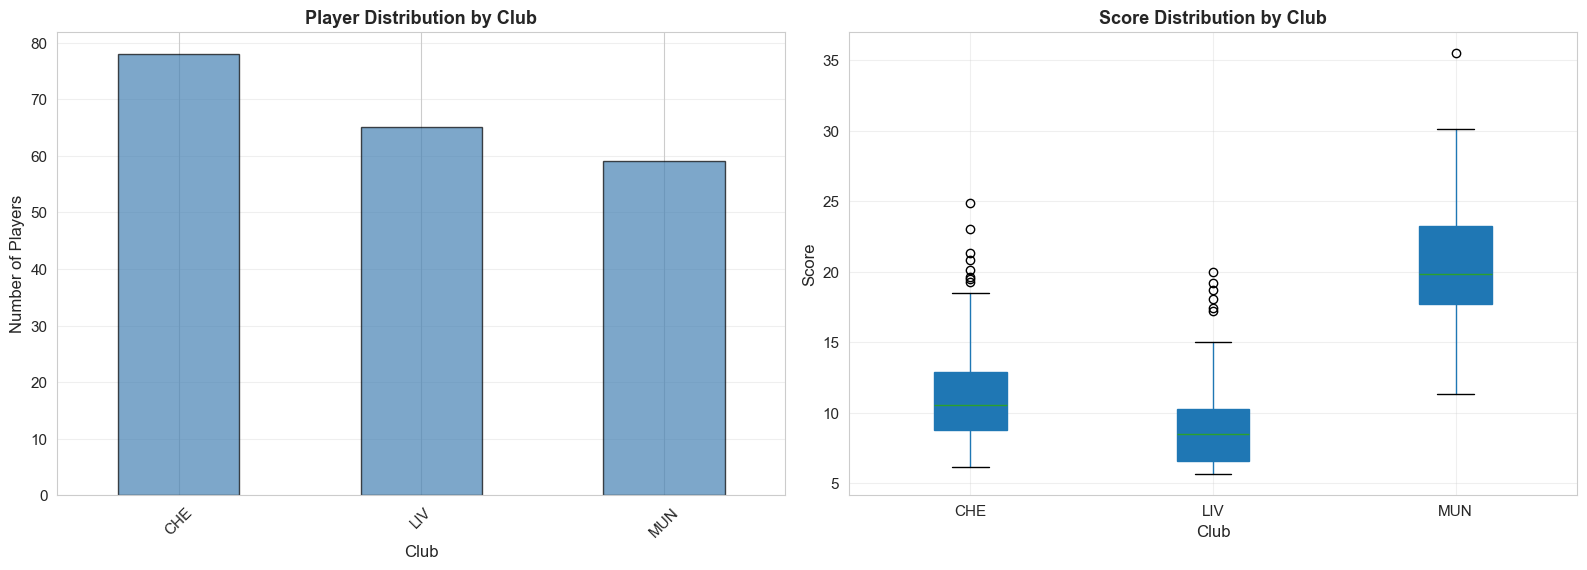


 Average Score by Club:
        mean  median    std  count
Club                              
MUN  20.5153 19.8300 4.5052     59
CHE  11.6147 10.5050 4.1925     78
LIV   9.4177  8.5100 3.7633     65


In [7]:

print("\n" + "-"*80)
print("CATEGORICAL ANALYSIS - Club Distribution")
print("-"*80)

# Count players per club
club_counts = soccer_df['Club'].value_counts()

print("\n Players per Club:")
print(club_counts)

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Bar chart of club counts
club_counts.plot(kind='bar', ax=axes[0], color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Club', fontsize=12)
axes[0].set_ylabel('Number of Players', fontsize=12)
axes[0].set_title('Player Distribution by Club', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].tick_params(axis='x', rotation=45)

# 2. Box plot: Score by Club
soccer_df.boxplot(column='Score', by='Club', ax=axes[1], patch_artist=True)
axes[1].set_xlabel('Club', fontsize=12)
axes[1].set_ylabel('Score', fontsize=12)
axes[1].set_title('Score Distribution by Club', fontsize=13, fontweight='bold')
axes[1].get_figure().suptitle('')  # Remove automatic title
axes[1].grid(True, alpha=0.3)

plt.tight_layout()

plt.show()

# Statistical comparison
print("\n Average Score by Club:")
club_scores = soccer_df.groupby('Club')['Score'].agg(['mean', 'median', 'std', 'count'])
club_scores = club_scores.sort_values('mean', ascending=False)
print(club_scores)





FEATURE RELATIONSHIPS WITH SCORE

--------------------------------------------------------------------------------
 Correlation Analysis
--------------------------------------------------------------------------------

 Correlation with Score (Target Variable):
Cost                     :  0.963  [STRONG   positive]
BMI                      :  0.188  [WEAK     positive]
Goals                    :  0.108  [WEAK     positive]
Weight                   : -0.000  [WEAK     negative]
AgentCharges             : -0.183  [WEAK     negative]
Height                   : -0.188  [WEAK     negative]
PreviousClubCost         : -0.362  [WEAK     negative]
DistanceCovered(InKms)   : -0.494  [MODERATE negative]
ShotsPerGame             : -0.532  [MODERATE negative]
MinutestoGoalRatio       : -0.532  [MODERATE negative]


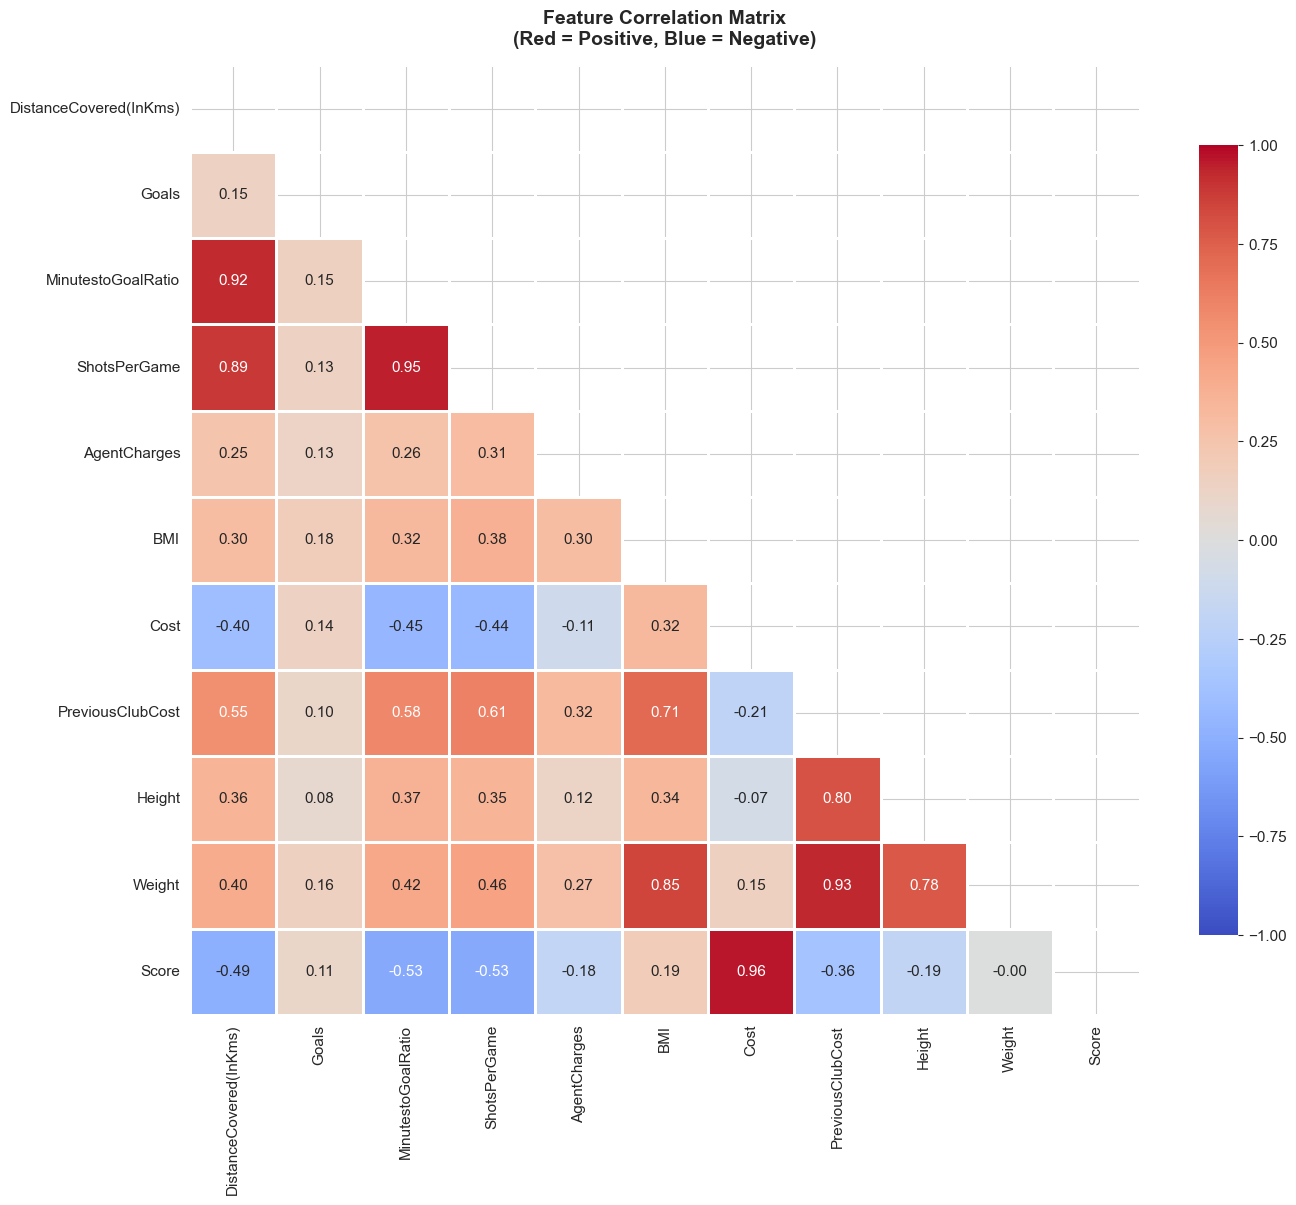


  Potential Multicollinearity Issues (|correlation| > 0.7):
             Feature 1          Feature 2  Correlation
                  Cost              Score       0.9630
    MinutestoGoalRatio       ShotsPerGame       0.9508
      PreviousClubCost             Weight       0.9309
DistanceCovered(InKms) MinutestoGoalRatio       0.9250
DistanceCovered(InKms)       ShotsPerGame       0.8888
                   BMI             Weight       0.8460
      PreviousClubCost             Height       0.8021
                Height             Weight       0.7809
                   BMI   PreviousClubCost       0.7139

  These features are highly correlated with each other!
   → May cause multicollinearity in regression


In [8]:
# ============================================================================
# STEP 5: NUMERICAL FEATURE CORRELATION ANALYSIS
# ============================================================================

print("\n" + "="*80)
print("FEATURE RELATIONSHIPS WITH SCORE")
print("="*80)

print("\n" + "-"*80)
print(" Correlation Analysis")
print("-"*80)

# Select numerical features only (exclude PlayerName, Club)
numerical_features = [
    'DistanceCovered(InKms)', 'Goals', 'MinutestoGoalRatio', 'ShotsPerGame',
    'AgentCharges', 'BMI', 'Cost', 'PreviousClubCost', 'Height', 'Weight', 'Score'
]

# Calculate correlation matrix
correlation_matrix = soccer_df[numerical_features].corr()

# Extract correlations with Score (our target)
score_correlations = correlation_matrix['Score'].drop('Score').sort_values(ascending=False)

print("\n Correlation with Score (Target Variable):")
print("="*60)
for feature, corr in score_correlations.items():
    strength = ""
    if abs(corr) > 0.7:
        strength = "STRONG"
    elif abs(corr) > 0.4:
        strength = "MODERATE"
    else:
        strength = "WEAK"
    
    direction = "positive" if corr > 0 else "negative"
    print(f"{feature:25s}: {corr:6.3f}  [{strength:8s} {direction}]")

# Visualize correlation matrix
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, fmt='.2f',
            vmin=-1, vmax=1)
plt.title('Feature Correlation Matrix\n(Red = Positive, Blue = Negative)', 
          fontsize=14, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()


# Identify multicollinearity issues
print("\n  Potential Multicollinearity Issues (|correlation| > 0.7):")
print("="*60)
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            high_corr_pairs.append({
                'Feature 1': correlation_matrix.columns[i],
                'Feature 2': correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i, j]
            })

if high_corr_pairs:
    high_corr_df = pd.DataFrame(high_corr_pairs).sort_values('Correlation', key=abs, ascending=False)
    print(high_corr_df.to_string(index=False))
    print("\n  These features are highly correlated with each other!")
    print("   → May cause multicollinearity in regression")
else:
    print("No severe multicollinearity detected among features")


--------------------------------------------------------------------------------
 Visual Analysis of Key Features
--------------------------------------------------------------------------------

Creating scatter plots for top 6 features most correlated with Score:
   1. Cost (r = 0.963)
   2. MinutestoGoalRatio (r = -0.532)
   3. ShotsPerGame (r = -0.532)
   4. DistanceCovered(InKms) (r = -0.494)
   5. PreviousClubCost (r = -0.362)
   6. Height (r = -0.188)


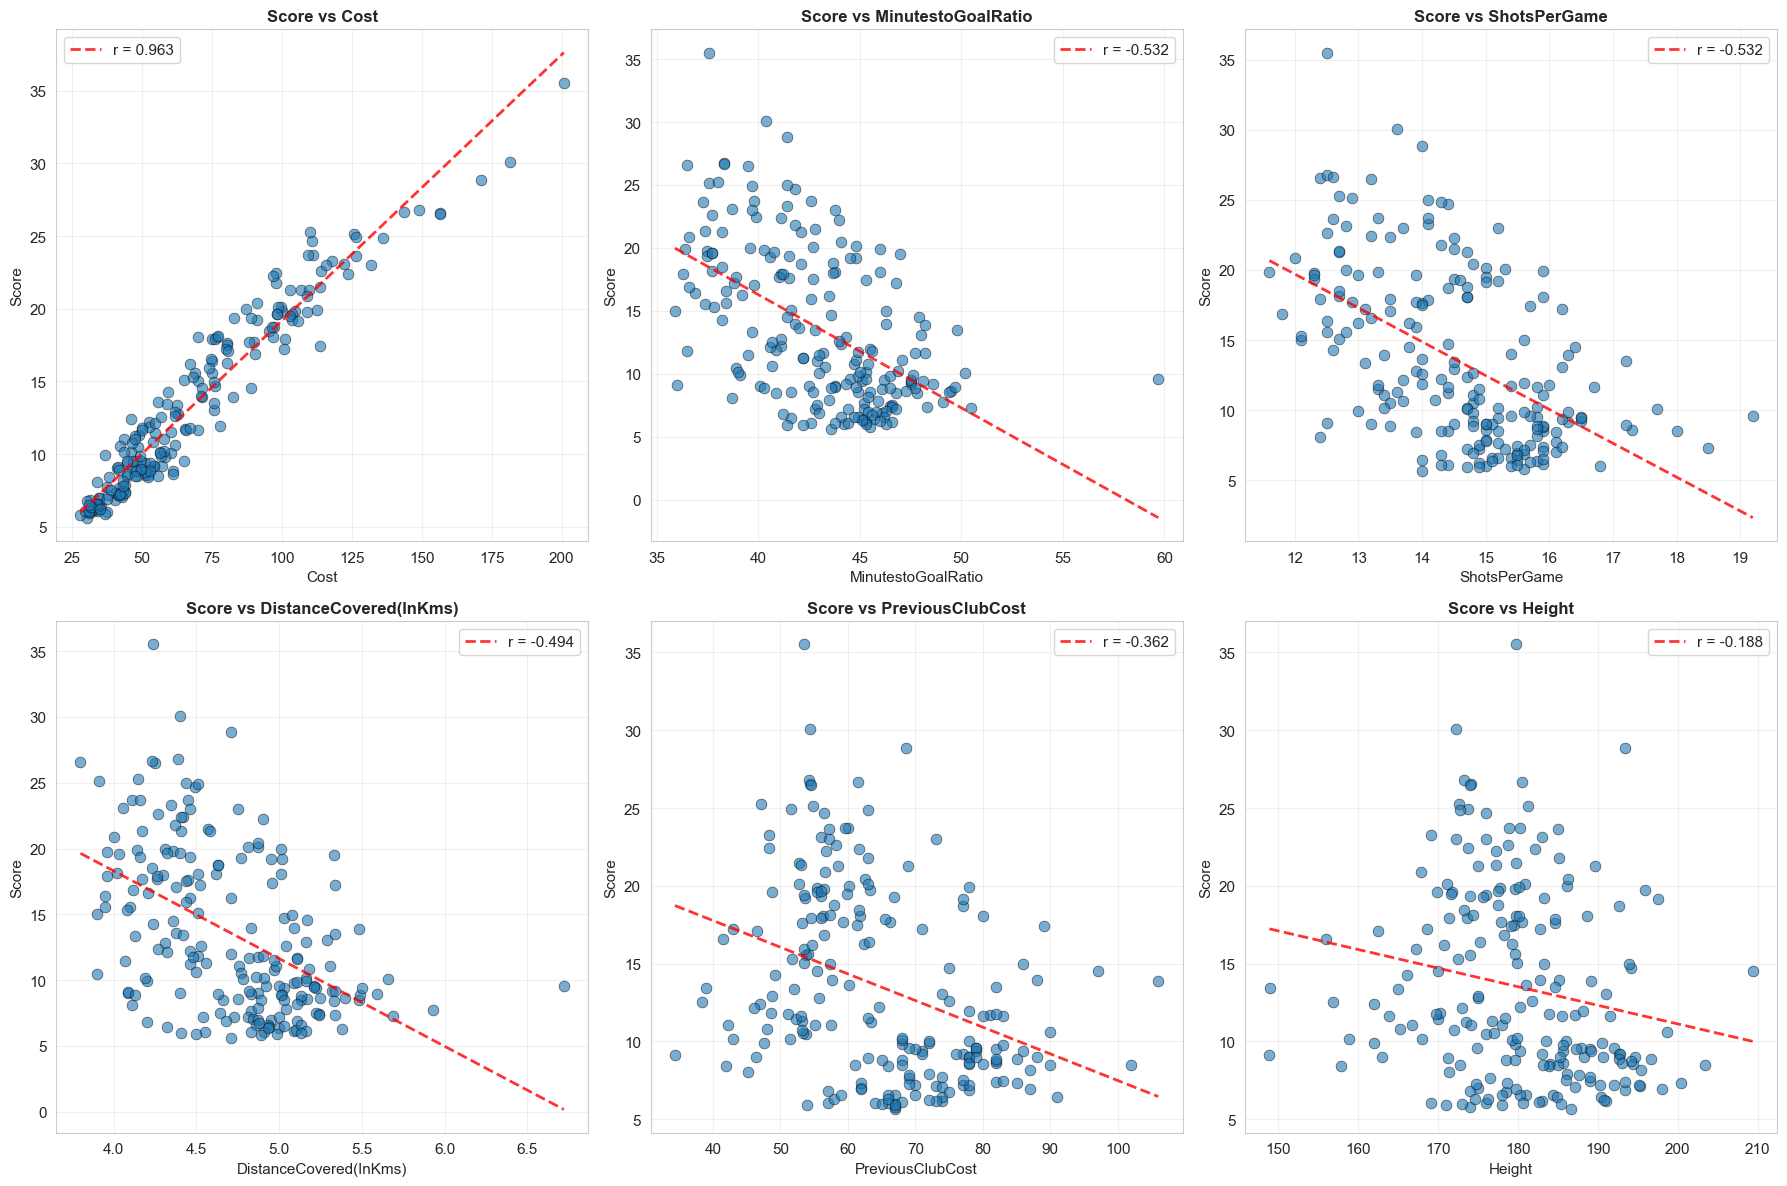

In [9]:
# ============================================================================
# STEP 6: SCATTER PLOTS - VISUAL RELATIONSHIPS
# ============================================================================

print("\n" + "-"*80)
print(" Visual Analysis of Key Features")
print("-"*80)

# Select top features correlated with Score
top_features = score_correlations.abs().nlargest(6).index.tolist()

print(f"\nCreating scatter plots for top 6 features most correlated with Score:")
for i, feat in enumerate(top_features, 1):
    print(f"   {i}. {feat} (r = {score_correlations[feat]:.3f})")

# Create scatter plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, feature in enumerate(top_features):
    # Scatter plot
    axes[idx].scatter(soccer_df[feature], soccer_df['Score'], 
                     alpha=0.6, edgecolors='k', linewidths=0.5, s=60)
    
    # Add regression line
    z = np.polyfit(soccer_df[feature], soccer_df['Score'], 1)
    p = np.poly1d(z)
    x_line = np.linspace(soccer_df[feature].min(), soccer_df[feature].max(), 100)
    axes[idx].plot(x_line, p(x_line), "r--", linewidth=2, alpha=0.8, 
                   label=f'r = {score_correlations[feature]:.3f}')
    
    axes[idx].set_xlabel(feature, fontsize=11)
    axes[idx].set_ylabel('Score', fontsize=11)
    axes[idx].set_title(f'Score vs {feature}', fontsize=12, fontweight='bold')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()




--------------------------------------------------------------------------------
 Financial Features Deep Dive
--------------------------------------------------------------------------------


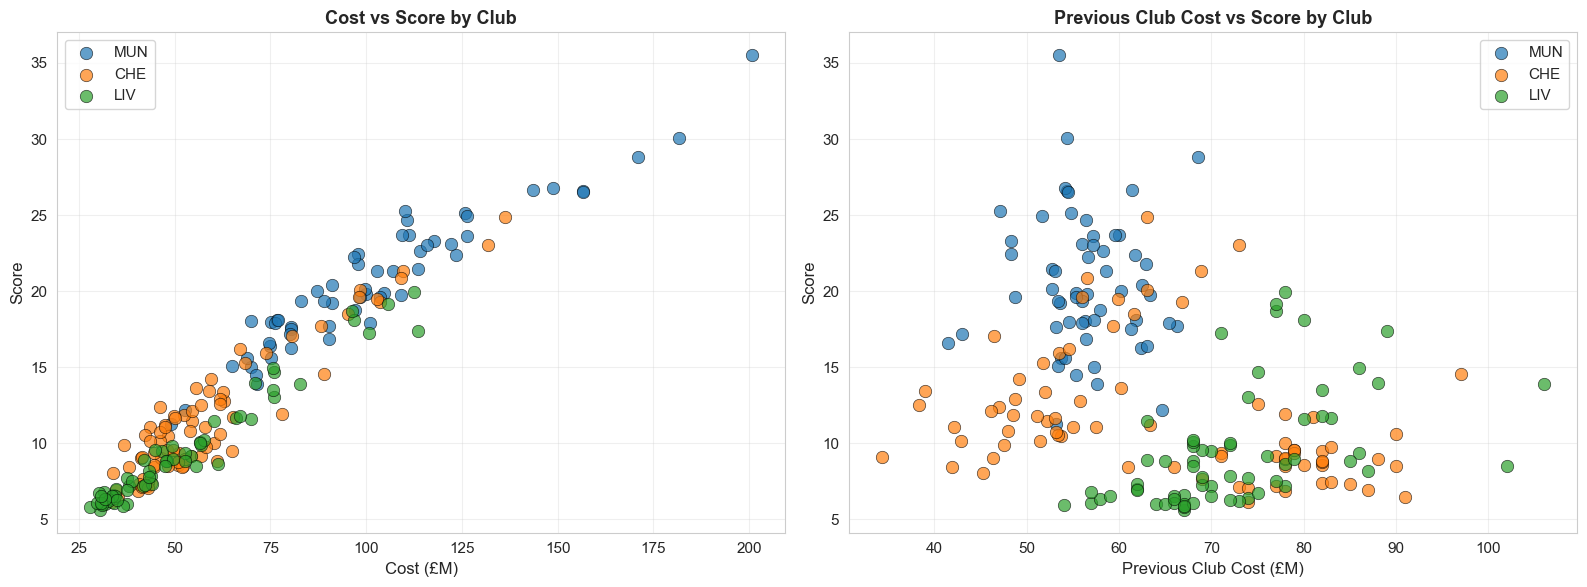


Financial Features by Club:
         Cost         PreviousClubCost         AgentCharges        
         mean  median             mean  median         mean  median
Club                                                               
CHE   58.9200 52.1500          65.0000 63.2200      75.2900 65.0000
LIV   51.5800 44.0000          72.4500 70.0000      98.5700 87.0000
MUN  101.5900 98.0000          56.3600 56.0500      55.0700 50.0000


In [10]:
# ============================================================================
# STEP 7: FINANCIAL FEATURES ANALYSIS
# ============================================================================

print("\n" + "-"*80)
print(" Financial Features Deep Dive")
print("-"*80)

# Cost vs Score by Club
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Cost vs Score (colored by Club)
for club in soccer_df['Club'].unique():
    club_data = soccer_df[soccer_df['Club'] == club]
    axes[0].scatter(club_data['Cost'], club_data['Score'], 
                   label=club, alpha=0.7, s=80, edgecolors='k', linewidths=0.5)

axes[0].set_xlabel('Cost (£M)', fontsize=12)
axes[0].set_ylabel('Score', fontsize=12)
axes[0].set_title('Cost vs Score by Club', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: PreviousClubCost vs Score
for club in soccer_df['Club'].unique():
    club_data = soccer_df[soccer_df['Club'] == club]
    axes[1].scatter(club_data['PreviousClubCost'], club_data['Score'], 
                   label=club, alpha=0.7, s=80, edgecolors='k', linewidths=0.5)

axes[1].set_xlabel('Previous Club Cost (£M)', fontsize=12)
axes[1].set_ylabel('Score', fontsize=12)
axes[1].set_title('Previous Club Cost vs Score by Club', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# Summary statistics
print("\nFinancial Features by Club:")
financial_summary = soccer_df.groupby('Club')[['Cost', 'PreviousClubCost', 'AgentCharges']].agg(['mean', 'median'])
print(financial_summary.round(2))

In [11]:
# ============================================================================
# STEP 8: FEATURE ENGINEERING - CREATE DUMMY VARIABLES
# ============================================================================

print("\n" + "="*80)
print("DATA PREPROCESSING & FEATURE ENGINEERING")
print("="*80)

print("\n" + "-"*80)
print("8.1: Creating Dummy Variables for Club")
print("-"*80)

# Show current club distribution
print("\n Current Club Distribution:")
print(soccer_df['Club'].value_counts())

# Create dummy variables
# We'll use 'drop_first=True' to avoid multicollinearity (dummy variable trap)
club_dummies = pd.get_dummies(soccer_df['Club'], prefix='Club', drop_first=True)

print("\n🔧 Dummy Variables Created:")
print(f"   Original variable: 'Club' (3 categories: {soccer_df['Club'].unique()})")
print(f"   New variables: {list(club_dummies.columns)}")
print(f"\n   Note: We dropped the first category (reference group)")
print(f"   Reference group: {soccer_df['Club'].unique()[0]}")
print(f"\n   How to interpret:")
print(f"   - Club_LIV = 1 if player is in Liverpool, 0 otherwise")
print(f"   - Club_MUN = 1 if player is in Manchester United, 0 otherwise")
print(f"   - Both = 0 means player is in {soccer_df['Club'].unique()[1]} (reference)")

# Show first few rows
print("\nFirst 5 rows of dummy variables:")
print(club_dummies.head())

# Add dummy variables to dataset
soccer_df_processed = soccer_df.copy()
soccer_df_processed = pd.concat([soccer_df_processed, club_dummies], axis=1)

print(f"\n Dataset updated with dummy variables")
print(f"   New shape: {soccer_df_processed.shape}")


DATA PREPROCESSING & FEATURE ENGINEERING

--------------------------------------------------------------------------------
8.1: Creating Dummy Variables for Club
--------------------------------------------------------------------------------

 Current Club Distribution:
Club
CHE    78
LIV    65
MUN    59
Name: count, dtype: int64

🔧 Dummy Variables Created:
   Original variable: 'Club' (3 categories: ['MUN' 'CHE' 'LIV'])
   New variables: ['Club_LIV', 'Club_MUN']

   Note: We dropped the first category (reference group)
   Reference group: MUN

   How to interpret:
   - Club_LIV = 1 if player is in Liverpool, 0 otherwise
   - Club_MUN = 1 if player is in Manchester United, 0 otherwise
   - Both = 0 means player is in CHE (reference)

First 5 rows of dummy variables:
   Club_LIV  Club_MUN
0     False      True
1     False      True
2     False      True
3     False      True
4     False      True

 Dataset updated with dummy variables
   New shape: (202, 15)


In [12]:

print("\n" + "-"*80)
print("Feature Selection Strategy")
print("-"*80)

print("\n🎯 Based on our EDA, here's our feature selection strategy:")
print("="*70)

print("\n📋 DECISIONS BY FEATURE CLUSTER:")

# Physical Attributes Cluster
print("\n  CLUSTER 1: Physical Attributes (Height, Weight, BMI)")
print("   Problem: All correlated (r > 0.78)")
print("   Decision: KEEP Weight, DROP Height & BMI")
print("   Reason:")
print("   - BMI = f(Weight, Height) → mathematically redundant")
print("   - Weight has slightly better interpretability")
print("   - Reduces from 3 features to 1")

# Performance Metrics Cluster
print("\n CLUSTER 2: Performance Metrics")
print("   (Goals, MinutestoGoalRatio, ShotsPerGame, DistanceCovered)")
print("   Problem: MinutestoGoalRatio ↔ ShotsPerGame (r=0.95)")
print("   Decision: DROP ALL performance metrics")
print("   Reason:")
print("   - All have weak/negative correlation with Score")
print("   - Highly correlated with each other")
print("   - May be OUTCOMES of Score, not predictors")
print("   - Focus on intrinsic attributes instead")

# Cost Variables
print("\n CLUSTER 3: Cost Variables (Cost, PreviousClubCost)")
print("   Problem: Cost ↔ Score (r=0.96) - suspiciously high!")
print("   Decision: KEEP BOTH (but monitor closely)")
print("   Reason:")
print("   - Both theoretically important")
print("   - Cost = current market value")
print("   - PreviousClubCost = bargain indicator (negative correlation!)")
print("   - Different information despite Cost being dominant")

# Other Variables
print("\n CLUSTER 4: Other Variables")
print("   AgentCharges: WEAK correlation (r=-0.18)")
print("   Decision: DROP")
print("   Reason: Not significant, doesn't add value")

# Club Variables
print("\n  CLUSTER 5: Club Dummies")
print("   Decision: KEEP Club_LIV and Club_MUN")
print("   Reason: Strong performance differences by club")

print("\n" + "="*70)
print("FINAL FEATURE SET")
print("="*70)

# Define final features
selected_features = [
    'Cost',              # Primary predictor (r=0.96)
    'PreviousClubCost',  # Bargain indicator
    'Weight',            # Physical attribute
    'Club_LIV',          # Club dummy
    'Club_MUN'           # Club dummy
]

dropped_features = [
    'PlayerName',               # Identifier (not a predictor)
    'Club',                     # Converted to dummies
    'DistanceCovered(InKms)',   # Performance metric
    'Goals',                    # Performance metric
    'MinutestoGoalRatio',       # Performance metric
    'ShotsPerGame',             # Performance metric
    'AgentCharges',             # Weak correlation
    'BMI',                      # Redundant with Weight
    'Height'                    # Redundant with Weight
]

print(f"\n SELECTED FEATURES ({len(selected_features)}):")
for i, feat in enumerate(selected_features, 1):
    print(f"   {i}. {feat}")

print(f"\n DROPPED FEATURES ({len(dropped_features)}):")
for i, feat in enumerate(dropped_features, 1):
    print(f"   {i}. {feat}")

print(f"\n Feature Reduction: {len(soccer_df.columns)-1} → {len(selected_features)}")
print(f"   (Excluding target variable 'Score')")

# Create final modeling dataset
X = soccer_df_processed[selected_features].copy()
y = soccer_df_processed['Score'].copy()

print(f"\n Modeling dataset created:")
print(f"   X (features): {X.shape}")
print(f"   y (target):   {y.shape}")


--------------------------------------------------------------------------------
Feature Selection Strategy
--------------------------------------------------------------------------------

🎯 Based on our EDA, here's our feature selection strategy:

📋 DECISIONS BY FEATURE CLUSTER:

  CLUSTER 1: Physical Attributes (Height, Weight, BMI)
   Problem: All correlated (r > 0.78)
   Decision: KEEP Weight, DROP Height & BMI
   Reason:
   - BMI = f(Weight, Height) → mathematically redundant
   - Weight has slightly better interpretability
   - Reduces from 3 features to 1

 CLUSTER 2: Performance Metrics
   (Goals, MinutestoGoalRatio, ShotsPerGame, DistanceCovered)
   Problem: MinutestoGoalRatio ↔ ShotsPerGame (r=0.95)
   Decision: DROP ALL performance metrics
   Reason:
   - All have weak/negative correlation with Score
   - Highly correlated with each other
   - May be OUTCOMES of Score, not predictors
   - Focus on intrinsic attributes instead

 CLUSTER 3: Cost Variables (Cost, PreviousClub


--------------------------------------------------------------------------------
Outlier Detection
--------------------------------------------------------------------------------

 Outliers in Target Variable (Score):
   IQR Method: Values outside [-5.76, 32.38]
   Number of outliers: 1 (0.5%)

   Outlier details:
                 PlayerName Club   Score     Cost
55  Dean, Mr. Bertram Frank  MUN 35.5200 200.8000


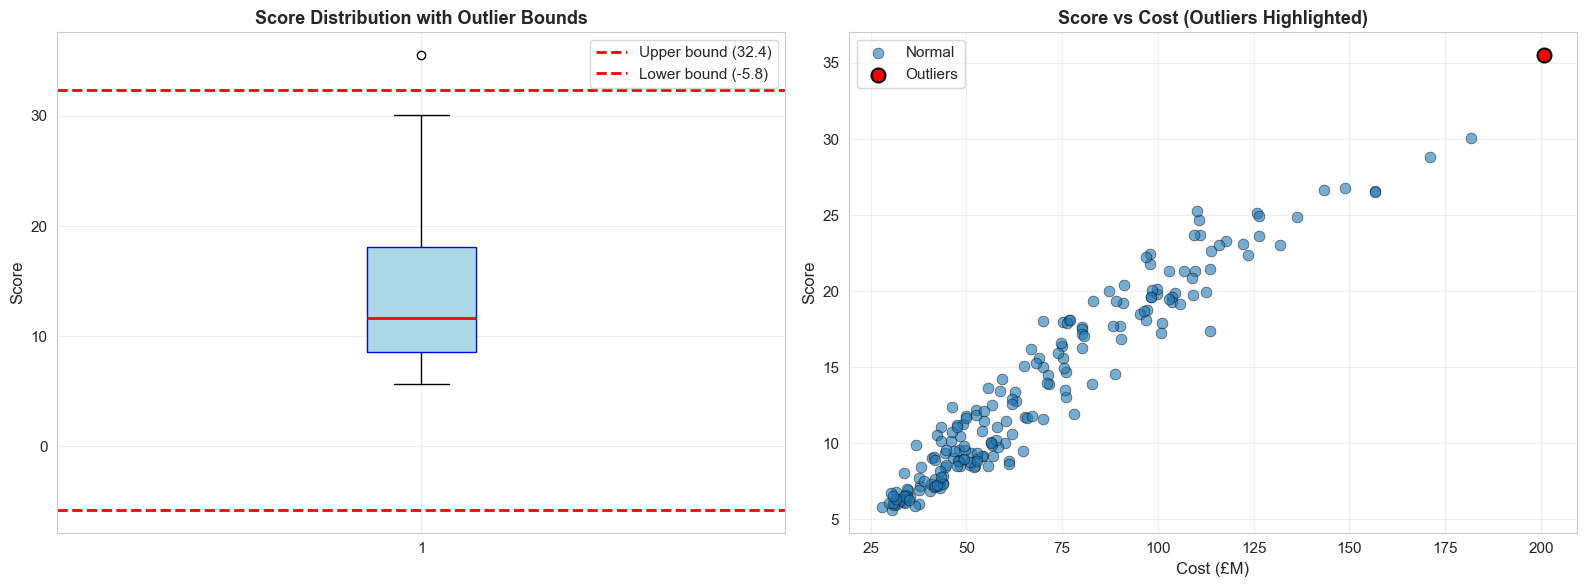

In [13]:

print("\n" + "-"*80)
print("Outlier Detection")
print("-"*80)

# Function to detect outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Check outliers in target variable
outliers_score, lower, upper = detect_outliers_iqr(soccer_df_processed, 'Score')

print(f"\n Outliers in Target Variable (Score):")
print(f"   IQR Method: Values outside [{lower:.2f}, {upper:.2f}]")
print(f"   Number of outliers: {len(outliers_score)} ({len(outliers_score)/len(soccer_df_processed)*100:.1f}%)")

if len(outliers_score) > 0:
    print(f"\n   Outlier details:")
    print(outliers_score[['PlayerName', 'Club', 'Score', 'Cost']].sort_values('Score', ascending=False))

# Visualize outliers
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Box plot for Score
axes[0].boxplot(soccer_df_processed['Score'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='blue'),
                medianprops=dict(color='red', linewidth=2))
axes[0].axhline(y=upper, color='r', linestyle='--', linewidth=2, label=f'Upper bound ({upper:.1f})')
axes[0].axhline(y=lower, color='r', linestyle='--', linewidth=2, label=f'Lower bound ({lower:.1f})')
axes[0].set_ylabel('Score', fontsize=12)
axes[0].set_title('Score Distribution with Outlier Bounds', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Scatter: Score vs Cost (highlight outliers)
axes[1].scatter(soccer_df_processed['Cost'], soccer_df_processed['Score'], 
               alpha=0.6, s=60, label='Normal', edgecolors='k', linewidths=0.5)
if len(outliers_score) > 0:
    axes[1].scatter(outliers_score['Cost'], outliers_score['Score'],
                   color='red', s=100, label='Outliers', edgecolors='black', linewidths=1.5)
axes[1].set_xlabel('Cost (£M)', fontsize=12)
axes[1].set_ylabel('Score', fontsize=12)
axes[1].set_title('Score vs Cost (Outliers Highlighted)', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [14]:


print("\n" + "="*80)
print("MODEL BUILDING - TRAIN-TEST SPLIT")
print("="*80)


# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\n Data Split:")
print(f"   Total observations:     {len(X)}")
print(f"   Training set:           {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"   Test set:               {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")

print(f"\n Target Variable Distribution:")
print(f"   Training - Mean: {y_train.mean():.2f}, Std: {y_train.std():.2f}")
print(f"   Test     - Mean: {y_test.mean():.2f}, Std: {y_test.std():.2f}")

# Check if distributions are similar
from scipy.stats import ks_2samp
ks_stat, ks_pval = ks_2samp(y_train, y_test)
print(f"\n Distribution Similarity Test (Kolmogorov-Smirnov):")
print(f"   p-value: {ks_pval:.4f}")
if ks_pval > 0.05:
    print("   Train and test distributions are similar")
else:
    print("    Train and test distributions differ")

print("\n Why split data?")
print("   - Train on 80% to build the model")
print("   - Test on 20% to evaluate generalization")
print("   - Prevents overfitting (model memorizing training data)")


MODEL BUILDING - TRAIN-TEST SPLIT

 Data Split:
   Total observations:     202
   Training set:           161 (79.7%)
   Test set:               41 (20.3%)

 Target Variable Distribution:
   Training - Mean: 13.61, Std: 6.18
   Test     - Mean: 13.11, Std: 6.28

 Distribution Similarity Test (Kolmogorov-Smirnov):
   p-value: 0.6569
   Train and test distributions are similar

 Why split data?
   - Train on 80% to build the model
   - Test on 20% to evaluate generalization
   - Prevents overfitting (model memorizing training data)



LINEAR REGRESSION MODEL - SKLEARN

 MODEL PERFORMANCE METRICS

Metric                    Training        Test            Difference     
--------------------------------------------------------------------------------
R² (R-squared)            0.9875          0.9891          0.0016         
RMSE                      0.6904          0.6480          0.0424         
MAE                       0.5112          0.4886          0.0226         

 Metric Explanations:
   R² = 98.9% of variance in Score is explained by our features
   RMSE = Average prediction error is ±0.65 score points
   MAE = Typical prediction is off by 0.49 score points

 No overfitting detected (R² difference = 0.0016)

MODEL COEFFICIENTS (SKLEARN)

Intercept: 10.8267

Feature Coefficients:
         Feature  Coefficient
        Club_MUN       0.9942
PreviousClubCost      -0.9867
          Weight       0.8577
        Club_LIV      -0.5540
            Cost       0.0326


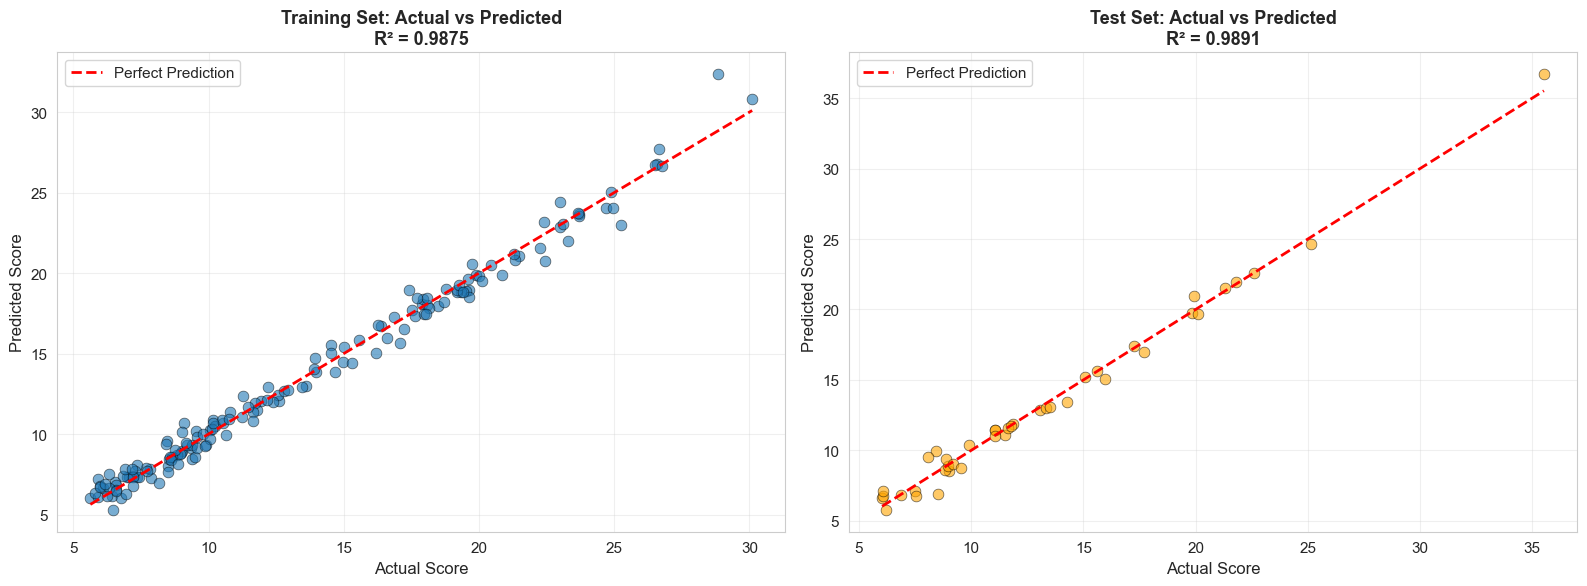

In [15]:


print("\n" + "="*80)
print("LINEAR REGRESSION MODEL - SKLEARN")
print("="*80)


# Create and train model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

# Calculate metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("\n MODEL PERFORMANCE METRICS")
print("="*80)
print(f"\n{'Metric':<25} {'Training':<15} {'Test':<15} {'Difference':<15}")
print("-"*80)
print(f"{'R² (R-squared)':<25} {train_r2:<15.4f} {test_r2:<15.4f} {abs(train_r2-test_r2):<15.4f}")
print(f"{'RMSE':<25} {train_rmse:<15.4f} {test_rmse:<15.4f} {abs(train_rmse-test_rmse):<15.4f}")
print(f"{'MAE':<25} {train_mae:<15.4f} {test_mae:<15.4f} {abs(train_mae-test_mae):<15.4f}")

print("\n Metric Explanations:")
print(f"   R² = {test_r2:.1%} of variance in Score is explained by our features")
print(f"   RMSE = Average prediction error is ±{test_rmse:.2f} score points")
print(f"   MAE = Typical prediction is off by {test_mae:.2f} score points")

# Check for overfitting
r2_diff = abs(train_r2 - test_r2)
if r2_diff < 0.05:
    print(f"\n No overfitting detected (R² difference = {r2_diff:.4f})")
elif r2_diff < 0.10:
    print(f"\n Slight overfitting (R² difference = {r2_diff:.4f})")
else:
    print(f"\n Overfitting detected! (R² difference = {r2_diff:.4f})")

# Display coefficients
print("\n" + "="*80)
print("MODEL COEFFICIENTS (SKLEARN)")
print("="*80)

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
})
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False)

print(f"\nIntercept: {lr_model.intercept_:.4f}")
print("\nFeature Coefficients:")
print(coef_df[['Feature', 'Coefficient']].to_string(index=False))

# Visualize predictions
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Training set predictions
axes[0].scatter(y_train, y_train_pred, alpha=0.6, edgecolors='k', linewidths=0.5, s=60)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 
             'r--', linewidth=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Score', fontsize=12)
axes[0].set_ylabel('Predicted Score', fontsize=12)
axes[0].set_title(f'Training Set: Actual vs Predicted\nR² = {train_r2:.4f}', 
                 fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Test set predictions
axes[1].scatter(y_test, y_test_pred, alpha=0.6, edgecolors='k', linewidths=0.5, s=60, color='orange')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'r--', linewidth=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Score', fontsize=12)
axes[1].set_ylabel('Predicted Score', fontsize=12)
axes[1].set_title(f'Test Set: Actual vs Predicted\nR² = {test_r2:.4f}', 
                 fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



In [16]:
# ============================================================================
# FIX: Ensure proper data types before statsmodels
# ============================================================================

print("\n🔧 Checking and fixing data types...")

# Check current data types
print("\nCurrent X data types:")
print(X_train.dtypes)

# Convert all columns to numeric (in case dummies are still uint8 or object)
X_train_clean = X_train.astype(float)
X_test_clean = X_test.astype(float)

print("\nFixed X data types:")
print(X_train_clean.dtypes)

# Also ensure y is numeric
y_train_clean = y_train.astype(float)
y_test_clean = y_test.astype(float)




🔧 Checking and fixing data types...

Current X data types:
Cost                float64
PreviousClubCost    float64
Weight              float64
Club_LIV               bool
Club_MUN               bool
dtype: object

Fixed X data types:
Cost                float64
PreviousClubCost    float64
Weight              float64
Club_LIV            float64
Club_MUN            float64
dtype: object


In [17]:

print("\n" + "="*80)
print("LINEAR REGRESSION MODEL - STATSMODELS OLS")
print("="*80)


# Add constant (intercept) - statsmodels doesn't do this automatically
X_train_sm = sm.add_constant(X_train_clean)
X_test_sm = sm.add_constant(X_test_clean)

# Verify no object types
print(f"\n Data types check:")
print(f"   X_train_sm types: {X_train_sm.dtypes.unique()}")
print(f"   y_train types: {y_train_clean.dtype}")

# Fit OLS model
ols_model = sm.OLS(y_train_clean, X_train_sm).fit()

# Display detailed summary
print("\n" + "="*80)
print("DETAILED REGRESSION RESULTS")
print("="*80)
print(ols_model.summary())

# Extract key statistics
print("\n" + "="*80)
print("KEY STATISTICS INTERPRETATION")
print("="*80)

print(f"\n Model Fit:")
print(f"   R-squared:           {ols_model.rsquared:.4f} ({ols_model.rsquared*100:.2f}% variance explained)")
print(f"   Adjusted R-squared:  {ols_model.rsquared_adj:.4f} (penalized for # of features)")
print(f"   F-statistic:         {ols_model.fvalue:.2f}")
print(f"   Prob (F-statistic):  {ols_model.f_pvalue:.2e}")

if ols_model.f_pvalue < 0.001:
    print("    Model is highly significant (p < 0.001)")
else:
    print("     Model may not be significant")

print(f"\n Model Quality:")
print(f"   AIC (Akaike):        {ols_model.aic:.2f} (lower is better)")
print(f"   BIC (Bayesian):      {ols_model.bic:.2f} (lower is better)")
print(f"   Condition Number:    {np.linalg.cond(X_train_sm):.2e}")

cond_num = np.linalg.cond(X_train_sm)
if cond_num < 30:
    print("   Low multicollinearity")
elif cond_num < 1000:
    print("    Moderate multicollinearity")
else:
    print("    Severe multicollinearity - interpret coefficients with caution!")

# Coefficient interpretation
print("\n" + "="*80)
print("COEFFICIENT INTERPRETATION (BUSINESS INSIGHTS)")
print("="*80)

coef_table = pd.DataFrame({
    'Feature': ols_model.params.index,
    'Coefficient': ols_model.params.values,
    'Std Error': ols_model.bse.values,
    'p-value': ols_model.pvalues.values,
    '95% CI Lower': ols_model.conf_int()[0].values,
    '95% CI Upper': ols_model.conf_int()[1].values
})

# Remove constant for business interpretation
coef_business = coef_table[coef_table['Feature'] != 'const'].copy()
coef_business['Significant'] = coef_business['p-value'].apply(
    lambda p: '***' if p < 0.001 else '**' if p < 0.01 else '*' if p < 0.05 else 'ns'
)

print("\nSignificance: *** p<0.001, ** p<0.01, * p<0.05, ns = not significant")
print("\n" + coef_business.to_string(index=False))

# Detailed business interpretation
print("\n" + "="*80)
print("BUSINESS INTERPRETATION OF COEFFICIENTS")
print("="*80)

for idx, row in coef_business.iterrows():
    feature = row['Feature']
    coef = row['Coefficient']
    pval = row['p-value']
    ci_low = row['95% CI Lower']
    ci_high = row['95% CI Upper']
    sig = row['Significant']
    
    if pval < 0.05:  # Only interpret significant coefficients
        print(f"\n{feature} {sig}")
        print(f"  Coefficient: {coef:.4f} (95% CI: [{ci_low:.4f}, {ci_high:.4f}])")
        
        if feature == 'Cost':
            print(f"  → Each £1M increase in transfer cost → +{coef:.4f} score points")
            print(f"  → £10M more expensive player → +{coef*10:.2f} score points expected")
            print(f"  → Example: £100M player vs £50M player = {coef*50:.1f} point difference")
        
        elif feature == 'PreviousClubCost':
            if coef < 0:
                print(f"  → Each £1M increase in PREVIOUS club cost → {coef:.4f} score points (NEGATIVE!)")
                print(f"  →  BARGAIN EFFECT: Players from cheaper clubs can outperform!")
                print(f"  → Strategy: Target players from lower-cost previous clubs")
            else:
                print(f"  → Each £1M increase in previous club cost → +{coef:.4f} score points")
        
        elif feature == 'Weight':
            print(f"  → Each 1kg increase in weight → {coef:.4f} score points")
            if coef > 0:
                print(f"  → 75kg player vs 70kg player → +{coef*5:.2f} score points")
                print(f"  → Physical robustness matters in EPL")
            else:
                print(f"  → Lighter players perform better (agility over power?)")
        
        elif feature == 'Club_LIV':
            print(f"  → Liverpool players score {coef:.4f} points vs Chelsea (baseline)")
            if coef < 0:
                print(f"  → Liverpool players UNDERPERFORM relative to Chelsea")
            else:
                print(f"  → Liverpool players OUTPERFORM relative to Chelsea")
        
        elif feature == 'Club_MUN':
            print(f"  → Manchester United players score {coef:.4f} points vs Chelsea (baseline)")
            if coef > 0:
                print(f"  → MUN players OUTPERFORM relative to Chelsea")
                print(f"  → Suggests better player development or system")
            else:
                print(f"  → MUN players UNDERPERFORM relative to Chelsea")
    else:
        print(f"\n{feature} (not significant, p={pval:.3f})")
        print(f"  → No reliable effect on Score")

print("\n" + "="*80)


LINEAR REGRESSION MODEL - STATSMODELS OLS

 Data types check:
   X_train_sm types: [dtype('float64')]
   y_train types: float64

DETAILED REGRESSION RESULTS
                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     2440.
Date:                Sat, 08 Nov 2025   Prob (F-statistic):          2.18e-145
Time:                        17:10:19   Log-Likelihood:                -168.80
No. Observations:                 161   AIC:                             349.6
Df Residuals:                     155   BIC:                             368.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t   


TEST SET EVALUATION

 TEST SET PERFORMANCE:
   R² Score:     0.9891
   RMSE:         0.6480
   MAE:          0.4886

 Sample Predictions on Test Set (First 10):
 Actual  Predicted   Error  Abs_Error
 8.4500     9.9785 -1.5285     1.5285
19.8300    19.7720  0.0580     0.0580
20.1200    19.6589  0.4611     0.4611
 8.5100     6.8973  1.6127     1.6127
13.0600    12.8860  0.1740     0.1740
 9.0300     8.5343  0.4957     0.4957
21.3000    21.4977 -0.1977     0.1977
 8.8400     8.5925  0.2475     0.2475
19.9400    20.9389 -0.9989     0.9989
22.6200    22.6217 -0.0017     0.0017


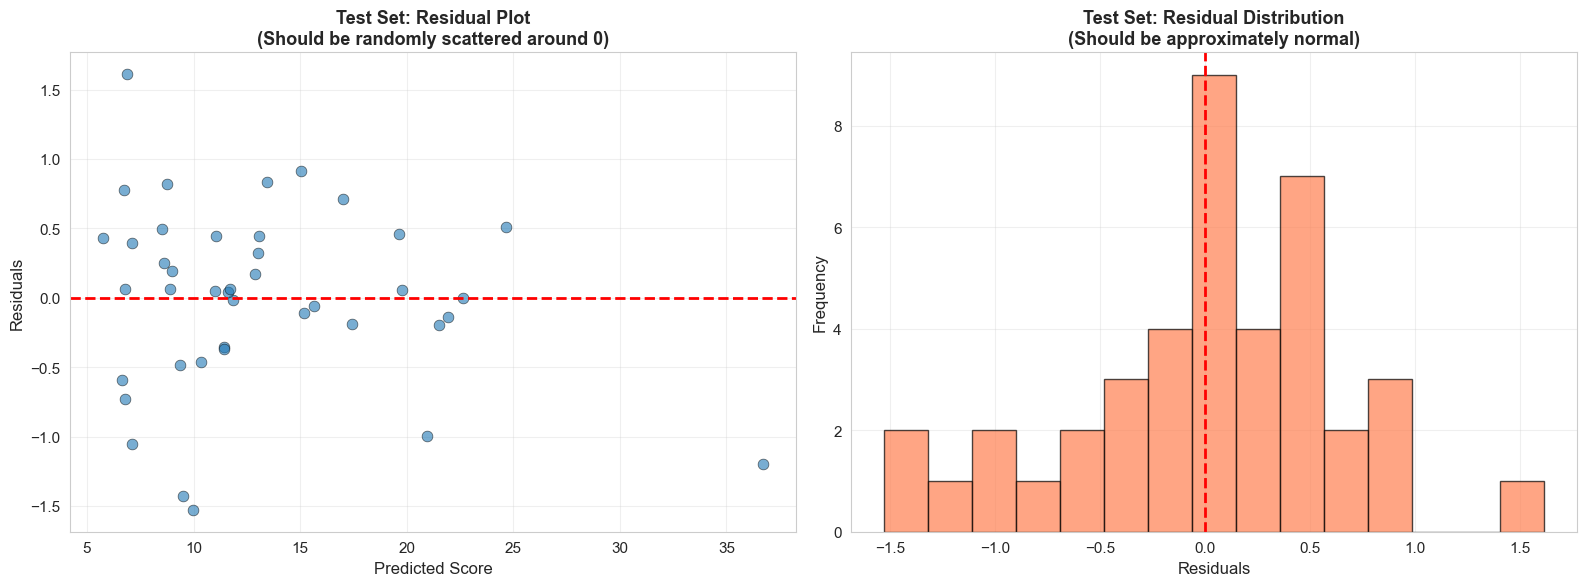


TRAIN vs TEST COMPARISON

Metric               Training        Test            Difference     
----------------------------------------------------------------------
R²                   0.9875          0.9891          0.0016         
RMSE                 0.6904          0.6480          0.0424         

MODEL SUMMARY

 MODEL PERFORMANCE:
   - Explains 98.9% of variance in player scores
   - Average prediction error: ±0.65 points
   - Model generalizes well (train vs test R² difference: 0.0016)



In [18]:


print("\n" + "="*80)
print("TEST SET EVALUATION")
print("="*80)

# Make predictions on test set using statsmodels
y_test_pred_sm = ols_model.predict(X_test_sm)

# Calculate test metrics
test_r2_sm = r2_score(y_test_clean, y_test_pred_sm)
test_rmse_sm = np.sqrt(mean_squared_error(y_test_clean, y_test_pred_sm))
test_mae_sm = mean_absolute_error(y_test_clean, y_test_pred_sm)

print("\n TEST SET PERFORMANCE:")
print("="*80)
print(f"   R² Score:     {test_r2_sm:.4f}")
print(f"   RMSE:         {test_rmse_sm:.4f}")
print(f"   MAE:          {test_mae_sm:.4f}")

# Show sample predictions
print("\n Sample Predictions on Test Set (First 10):")
print("="*80)

test_results = pd.DataFrame({
    'Actual': y_test_clean.values[:10],
    'Predicted': y_test_pred_sm[:10],
    'Error': y_test_clean.values[:10] - y_test_pred_sm[:10],
    'Abs_Error': np.abs(y_test_clean.values[:10] - y_test_pred_sm[:10])
})
print(test_results.to_string(index=False))

# Residual plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Residuals vs Predicted
residuals_test = y_test_clean - y_test_pred_sm
axes[0].scatter(y_test_pred_sm, residuals_test, alpha=0.6, edgecolors='k', linewidths=0.5, s=60)
axes[0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0].set_xlabel('Predicted Score', fontsize=12)
axes[0].set_ylabel('Residuals', fontsize=12)
axes[0].set_title('Test Set: Residual Plot\n(Should be randomly scattered around 0)', 
                 fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Residual histogram
axes[1].hist(residuals_test, bins=15, edgecolor='black', alpha=0.7, color='coral')
axes[1].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1].set_xlabel('Residuals', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Test Set: Residual Distribution\n(Should be approximately normal)', 
                 fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('09_test_set_diagnostics.png', dpi=300, bbox_inches='tight')
plt.show()


# Compare train vs test
print("\n" + "="*80)
print("TRAIN vs TEST COMPARISON")
print("="*80)
print(f"\n{'Metric':<20} {'Training':<15} {'Test':<15} {'Difference':<15}")
print("-"*70)
print(f"{'R²':<20} {ols_model.rsquared:<15.4f} {test_r2_sm:<15.4f} {abs(ols_model.rsquared-test_r2_sm):<15.4f}")

# Get training predictions for RMSE comparison
y_train_pred_sm = ols_model.predict(X_train_sm)
train_rmse_sm = np.sqrt(mean_squared_error(y_train_clean, y_train_pred_sm))

print(f"{'RMSE':<20} {train_rmse_sm:<15.4f} {test_rmse_sm:<15.4f} {abs(train_rmse_sm-test_rmse_sm):<15.4f}")

# Summary
print("\n" + "="*80)
print("MODEL SUMMARY")
print("="*80)
print(f"""
 MODEL PERFORMANCE:
   - Explains {test_r2_sm*100:.1f}% of variance in player scores
   - Average prediction error: ±{test_rmse_sm:.2f} points
   - Model generalizes well (train vs test R² difference: {abs(ols_model.rsquared-test_r2_sm):.4f})
""")

In [19]:

print("="*80)
print("REGULARIZATION MODELS")
print("Ridge, Lasso, and ElasticNet Comparison")
print("="*80)

print("\n Why Use Regularization?")
print("="*80)
regularization_explanation = """
REGULARIZATION adds a penalty to large coefficients to:
1. Handle multicollinearity (your condition number = 1,040)
2. Prevent overfitting
3. Improve generalization to new data
4. Automatic feature selection (Lasso)

Three Types:
├─ Ridge (L2): Shrinks coefficients, keeps all features
├─ Lasso (L1): Can zero out coefficients (feature selection)
└─ ElasticNet: Combines Ridge + Lasso (best of both)
"""
print(regularization_explanation)



# Standardize features (REQUIRED for regularization!)
print("\n Standardizing Features...")
print("="*80)
print("Why? Regularization penalizes large coefficients")
print("      Different scales → unfair penalties")
print("      Solution: Standardize (mean=0, std=1)")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_clean)
X_test_scaled = scaler.transform(X_test_clean)

print(f"\n Standardization complete!")
print(f"   Training set: {X_train_scaled.shape}")
print(f"   Test set: {X_test_scaled.shape}")

# Convert back to DataFrame for easier tracking
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_clean.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_clean.columns)

print("\n Feature Statistics After Standardization (Train):")
print(X_train_scaled_df.describe().round(3))

REGULARIZATION MODELS
Ridge, Lasso, and ElasticNet Comparison

 Why Use Regularization?

REGULARIZATION adds a penalty to large coefficients to:
1. Handle multicollinearity (your condition number = 1,040)
2. Prevent overfitting
3. Improve generalization to new data
4. Automatic feature selection (Lasso)

Three Types:
├─ Ridge (L2): Shrinks coefficients, keeps all features
├─ Lasso (L1): Can zero out coefficients (feature selection)
└─ ElasticNet: Combines Ridge + Lasso (best of both)


 Standardizing Features...
Why? Regularization penalizes large coefficients
      Different scales → unfair penalties
      Solution: Standardize (mean=0, std=1)

 Standardization complete!
   Training set: (161, 5)
   Test set: (41, 5)

 Feature Statistics After Standardization (Train):
          Cost  PreviousClubCost   Weight  Club_LIV  Club_MUN
count 161.0000          161.0000 161.0000  161.0000  161.0000
mean    0.0000            0.0000   0.0000    0.0000    0.0000
std     1.0030            1.0030  

In [20]:
# ============================================================================
# STEP 21: RIDGE REGRESSION (L2 REGULARIZATION)
# ============================================================================

print("\n" + "="*80)
print("STEP 21: RIDGE REGRESSION")
print("="*80)

print("\n What is Ridge?")
print("="*80)
print("""
Ridge adds penalty: α * Σ(βᵢ²)
- Shrinks ALL coefficients toward zero
- Never eliminates features completely
- Best when ALL features are relevant
- Handles multicollinearity well
""")

# Use RidgeCV to find optimal alpha automatically
print("\n Finding Optimal Alpha (Cross-Validation)...")
print("="*80)

# Try range of alpha values
alphas_ridge = np.logspace(-3, 3, 100)  # 0.001 to 1000

ridge_cv = RidgeCV(alphas=alphas_ridge, cv=5, scoring='r2')
ridge_cv.fit(X_train_scaled, y_train_clean)

print(f" Optimal Alpha Found: {ridge_cv.alpha_:.4f}")
print(f"   Cross-Validation R²: {ridge_cv.best_score_:.4f}")

# Fit Ridge with optimal alpha
ridge_model = Ridge(alpha=ridge_cv.alpha_)
ridge_model.fit(X_train_scaled, y_train_clean)

# Predictions
y_train_pred_ridge = ridge_model.predict(X_train_scaled)
y_test_pred_ridge = ridge_model.predict(X_test_scaled)

# Metrics
ridge_metrics = {
    'train_r2': r2_score(y_train_clean, y_train_pred_ridge),
    'test_r2': r2_score(y_test_clean, y_test_pred_ridge),
    'train_rmse': np.sqrt(mean_squared_error(y_train_clean, y_train_pred_ridge)),
    'test_rmse': np.sqrt(mean_squared_error(y_test_clean, y_test_pred_ridge)),
    'train_mae': mean_absolute_error(y_train_clean, y_train_pred_ridge),
    'test_mae': mean_absolute_error(y_test_clean, y_test_pred_ridge),
    'alpha': ridge_cv.alpha_
}

print("\n Ridge Performance:")
print("="*80)
print(f"Training R²:   {ridge_metrics['train_r2']:.4f}")
print(f"Test R²:       {ridge_metrics['test_r2']:.4f}")
print(f"Training RMSE: {ridge_metrics['train_rmse']:.4f}")
print(f"Test RMSE:     {ridge_metrics['test_rmse']:.4f}")
print(f"Training MAE:  {ridge_metrics['train_mae']:.4f}")
print(f"Test MAE:      {ridge_metrics['test_mae']:.4f}")

# Coefficient analysis
ridge_coefs = pd.DataFrame({
    'Feature': X_train_clean.columns,
    'Coefficient': ridge_model.coef_
})
ridge_coefs['Abs_Coef'] = ridge_coefs['Coefficient'].abs()
ridge_coefs = ridge_coefs.sort_values('Abs_Coef', ascending=False)

print("\n Ridge Coefficients (Standardized):")
print(ridge_coefs.to_string(index=False))


STEP 21: RIDGE REGRESSION

 What is Ridge?

Ridge adds penalty: α * Σ(βᵢ²)
- Shrinks ALL coefficients toward zero
- Never eliminates features completely
- Best when ALL features are relevant
- Handles multicollinearity well


 Finding Optimal Alpha (Cross-Validation)...
 Optimal Alpha Found: 0.0010
   Cross-Validation R²: 0.9854

 Ridge Performance:
Training R²:   0.9875
Test R²:       0.9891
Training RMSE: 0.6904
Test RMSE:     0.6475
Training MAE:  0.5114
Test MAE:      0.4881

 Ridge Coefficients (Standardized):
         Feature  Coefficient  Abs_Coef
PreviousClubCost     -12.6685   12.6685
          Weight      11.6220   11.6220
            Cost       1.0568    1.0568
        Club_MUN       0.4631    0.4631
        Club_LIV      -0.2578    0.2578


In [21]:
# ============================================================================
# STEP 22: LASSO REGRESSION (L1 REGULARIZATION)
# ============================================================================

print("\n" + "="*80)
print("LASSO REGRESSION")
print("="*80)

print("\n What is Lasso?")
print("="*80)
print("""
Lasso adds penalty: α * Σ|βᵢ|
- Can ZERO OUT coefficients (feature selection)
- Automatically identifies most important features
- Best when only SOME features are relevant
- Creates sparse models
""")

# Use LassoCV to find optimal alpha
print("\n Finding Optimal Alpha (Cross-Validation)...")
print("="*80)

alphas_lasso = np.logspace(-3, 1, 100)  # 0.001 to 10

lasso_cv = LassoCV(alphas=alphas_lasso, cv=5, max_iter=10000, random_state=42)
lasso_cv.fit(X_train_scaled, y_train_clean)

print(f" Optimal Alpha Found: {lasso_cv.alpha_:.4f}")

# Fit Lasso with optimal alpha
lasso_model = Lasso(alpha=lasso_cv.alpha_, max_iter=10000, random_state=42)
lasso_model.fit(X_train_scaled, y_train_clean)

# Predictions
y_train_pred_lasso = lasso_model.predict(X_train_scaled)
y_test_pred_lasso = lasso_model.predict(X_test_scaled)

# Metrics
lasso_metrics = {
    'train_r2': r2_score(y_train_clean, y_train_pred_lasso),
    'test_r2': r2_score(y_test_clean, y_test_pred_lasso),
    'train_rmse': np.sqrt(mean_squared_error(y_train_clean, y_train_pred_lasso)),
    'test_rmse': np.sqrt(mean_squared_error(y_test_clean, y_test_pred_lasso)),
    'train_mae': mean_absolute_error(y_train_clean, y_train_pred_lasso),
    'test_mae': mean_absolute_error(y_test_clean, y_test_pred_lasso),
    'alpha': lasso_cv.alpha_
}

print("\n Lasso Performance:")
print("="*80)
print(f"Training R²:   {lasso_metrics['train_r2']:.4f}")
print(f"Test R²:       {lasso_metrics['test_r2']:.4f}")
print(f"Training RMSE: {lasso_metrics['train_rmse']:.4f}")
print(f"Test RMSE:     {lasso_metrics['test_rmse']:.4f}")
print(f"Training MAE:  {lasso_metrics['train_mae']:.4f}")
print(f"Test MAE:      {lasso_metrics['test_mae']:.4f}")

# Coefficient analysis
lasso_coefs = pd.DataFrame({
    'Feature': X_train_clean.columns,
    'Coefficient': lasso_model.coef_
})
lasso_coefs['Abs_Coef'] = lasso_coefs['Coefficient'].abs()
lasso_coefs['Selected'] = lasso_coefs['Coefficient'] != 0
lasso_coefs = lasso_coefs.sort_values('Abs_Coef', ascending=False)

print("\n Lasso Coefficients (Standardized):")
print(lasso_coefs.to_string(index=False))

n_selected = lasso_coefs['Selected'].sum()
n_total = len(lasso_coefs)
print(f"\n Feature Selection: {n_selected}/{n_total} features selected")
if n_selected < n_total:
    dropped = lasso_coefs[lasso_coefs['Coefficient'] == 0]['Feature'].tolist()
    print(f"   Dropped features: {dropped}")


LASSO REGRESSION

 What is Lasso?

Lasso adds penalty: α * Σ|βᵢ|
- Can ZERO OUT coefficients (feature selection)
- Automatically identifies most important features
- Best when only SOME features are relevant
- Creates sparse models


 Finding Optimal Alpha (Cross-Validation)...
 Optimal Alpha Found: 0.0010

 Lasso Performance:
Training R²:   0.9874
Test R²:       0.9893
Training RMSE: 0.6907
Test RMSE:     0.6423
Training MAE:  0.5139
Test MAE:      0.4826

 Lasso Coefficients (Standardized):
         Feature  Coefficient  Abs_Coef  Selected
PreviousClubCost     -12.4513   12.4513      True
          Weight      11.4120   11.4120      True
            Cost       1.1303    1.1303      True
        Club_MUN       0.4684    0.4684      True
        Club_LIV      -0.2573    0.2573      True

 Feature Selection: 5/5 features selected


In [22]:
# ============================================================================
# STEP 23: ELASTICNET REGRESSION (L1 + L2 REGULARIZATION)
# ============================================================================

print("\n" + "="*80)
print("STEP 23: ELASTICNET REGRESSION")
print("="*80)

print("\n What is ElasticNet?")
print("="*80)
print("""
ElasticNet combines Ridge + Lasso:
Penalty: α * [ℓ₁_ratio * Σ|βᵢ| + (1 - ℓ₁_ratio) * Σ(βᵢ²)]

- Gets benefits of BOTH Ridge and Lasso
- Can select features (like Lasso)
- Handles correlated features better (like Ridge)
- Most flexible and often best performer
- Two parameters: alpha and l1_ratio
""")

# Use ElasticNetCV to find optimal parameters
print("\n Finding Optimal Alpha and L1 Ratio (Cross-Validation)...")
print("="*80)

alphas_elastic = np.logspace(-3, 1, 50)
l1_ratios = [0.1, 0.3, 0.5, 0.7, 0.9, 0.95, 0.99]  # 0=Ridge, 1=Lasso

elastic_cv = ElasticNetCV(
    alphas=alphas_elastic,
    l1_ratio=l1_ratios,
    cv=5,
    max_iter=10000,
    random_state=42
)
elastic_cv.fit(X_train_scaled, y_train_clean)

print(f" Optimal Alpha Found: {elastic_cv.alpha_:.4f}")
print(f" Optimal L1 Ratio Found: {elastic_cv.l1_ratio_:.4f}")
print(f"   (0=Ridge, 1=Lasso, 0.5=Equal mix)")

# Fit ElasticNet with optimal parameters
elastic_model = ElasticNet(
    alpha=elastic_cv.alpha_,
    l1_ratio=elastic_cv.l1_ratio_,
    max_iter=10000,
    random_state=42
)
elastic_model.fit(X_train_scaled, y_train_clean)

# Predictions
y_train_pred_elastic = elastic_model.predict(X_train_scaled)
y_test_pred_elastic = elastic_model.predict(X_test_scaled)

# Metrics
elastic_metrics = {
    'train_r2': r2_score(y_train_clean, y_train_pred_elastic),
    'test_r2': r2_score(y_test_clean, y_test_pred_elastic),
    'train_rmse': np.sqrt(mean_squared_error(y_train_clean, y_train_pred_elastic)),
    'test_rmse': np.sqrt(mean_squared_error(y_test_clean, y_test_pred_elastic)),
    'train_mae': mean_absolute_error(y_train_clean, y_train_pred_elastic),
    'test_mae': mean_absolute_error(y_test_clean, y_test_pred_elastic),
    'alpha': elastic_cv.alpha_,
    'l1_ratio': elastic_cv.l1_ratio_
}

print("\n ElasticNet Performance:")
print("="*80)
print(f"Training R²:   {elastic_metrics['train_r2']:.4f}")
print(f"Test R²:       {elastic_metrics['test_r2']:.4f}")
print(f"Training RMSE: {elastic_metrics['train_rmse']:.4f}")
print(f"Test RMSE:     {elastic_metrics['test_rmse']:.4f}")
print(f"Training MAE:  {elastic_metrics['train_mae']:.4f}")
print(f"Test MAE:      {elastic_metrics['test_mae']:.4f}")

# Coefficient analysis
elastic_coefs = pd.DataFrame({
    'Feature': X_train_clean.columns,
    'Coefficient': elastic_model.coef_
})
elastic_coefs['Abs_Coef'] = elastic_coefs['Coefficient'].abs()
elastic_coefs['Selected'] = elastic_coefs['Coefficient'] != 0
elastic_coefs = elastic_coefs.sort_values('Abs_Coef', ascending=False)

print("\n ElasticNet Coefficients (Standardized):")
print(elastic_coefs.to_string(index=False))

n_selected_elastic = elastic_coefs['Selected'].sum()
print(f"\n Feature Selection: {n_selected_elastic}/{n_total} features selected")
if n_selected_elastic < n_total:
    dropped_elastic = elastic_coefs[elastic_coefs['Coefficient'] == 0]['Feature'].tolist()
    print(f"   Dropped features: {dropped_elastic}")


STEP 23: ELASTICNET REGRESSION

 What is ElasticNet?

ElasticNet combines Ridge + Lasso:
Penalty: α * [ℓ₁_ratio * Σ|βᵢ| + (1 - ℓ₁_ratio) * Σ(βᵢ²)]

- Gets benefits of BOTH Ridge and Lasso
- Can select features (like Lasso)
- Handles correlated features better (like Ridge)
- Most flexible and often best performer
- Two parameters: alpha and l1_ratio


 Finding Optimal Alpha and L1 Ratio (Cross-Validation)...
 Optimal Alpha Found: 0.0010
 Optimal L1 Ratio Found: 0.9900
   (0=Ridge, 1=Lasso, 0.5=Equal mix)

 ElasticNet Performance:
Training R²:   0.9874
Test R²:       0.9893
Training RMSE: 0.6908
Test RMSE:     0.6416
Training MAE:  0.5143
Test MAE:      0.4819

 ElasticNet Coefficients (Standardized):
         Feature  Coefficient  Abs_Coef  Selected
PreviousClubCost     -12.4220   12.4220      True
          Weight      11.3837   11.3837      True
            Cost       1.1402    1.1402      True
        Club_MUN       0.4692    0.4692      True
        Club_LIV      -0.2573    0.2573 

In [23]:

print("\n" + "="*80)
print("COMPREHENSIVE MODEL COMPARISON")
print("="*80)

# Compile all metrics
comparison_df = pd.DataFrame({
    'Model': ['OLS (Baseline)', 'Ridge', 'Lasso', 'ElasticNet'],
    'Train_R2': [
        ols_model.rsquared,
        ridge_metrics['train_r2'],
        lasso_metrics['train_r2'],
        elastic_metrics['train_r2']
    ],
    'Test_R2': [
        r2_score(y_test_clean, ols_model.predict(sm.add_constant(X_test_clean))),
        ridge_metrics['test_r2'],
        lasso_metrics['test_r2'],
        elastic_metrics['test_r2']
    ],
    'Train_RMSE': [
        np.sqrt(mean_squared_error(y_train_clean, ols_model.fittedvalues)),
        ridge_metrics['train_rmse'],
        lasso_metrics['train_rmse'],
        elastic_metrics['train_rmse']
    ],
    'Test_RMSE': [
        np.sqrt(mean_squared_error(y_test_clean, ols_model.predict(sm.add_constant(X_test_clean)))),
        ridge_metrics['test_rmse'],
        lasso_metrics['test_rmse'],
        elastic_metrics['test_rmse']
    ],
    'Train_MAE': [
        mean_absolute_error(y_train_clean, ols_model.fittedvalues),
        ridge_metrics['train_mae'],
        lasso_metrics['train_mae'],
        elastic_metrics['train_mae']
    ],
    'Test_MAE': [
        mean_absolute_error(y_test_clean, ols_model.predict(sm.add_constant(X_test_clean))),
        ridge_metrics['test_mae'],
        lasso_metrics['test_mae'],
        elastic_metrics['test_mae']
    ],
    'N_Features': [5, 5, n_selected, n_selected_elastic],
    'Regularization': ['None', f'α={ridge_cv.alpha_:.3f}', 
                       f'α={lasso_cv.alpha_:.3f}',
                       f'α={elastic_cv.alpha_:.3f}, ℓ₁={elastic_cv.l1_ratio_:.2f}']
})

# Calculate overfitting measure
comparison_df['Overfit'] = comparison_df['Train_R2'] - comparison_df['Test_R2']

print("\n PERFORMANCE COMPARISON TABLE")
print("="*80)
print(comparison_df.to_string(index=False))

# Identify best models
print("\n BEST MODELS BY METRIC:")
print("="*80)
print(f"Best Test R²:     {comparison_df.loc[comparison_df['Test_R2'].idxmax(), 'Model']} "
      f"(R² = {comparison_df['Test_R2'].max():.4f})")
print(f"Best Test RMSE:   {comparison_df.loc[comparison_df['Test_RMSE'].idxmin(), 'Model']} "
      f"(RMSE = {comparison_df['Test_RMSE'].min():.4f})")
print(f"Least Overfitting: {comparison_df.loc[comparison_df['Overfit'].abs().idxmin(), 'Model']} "
      f"(Δ = {comparison_df['Overfit'].abs().min():.4f})")



COMPREHENSIVE MODEL COMPARISON

 PERFORMANCE COMPARISON TABLE
         Model  Train_R2  Test_R2  Train_RMSE  Test_RMSE  Train_MAE  Test_MAE  N_Features   Regularization  Overfit
OLS (Baseline)    0.9875   0.9891      0.6904     0.6480     0.5112    0.4886           5             None  -0.0016
         Ridge    0.9875   0.9891      0.6904     0.6475     0.5114    0.4881           5          α=0.001  -0.0016
         Lasso    0.9874   0.9893      0.6907     0.6423     0.5139    0.4826           5          α=0.001  -0.0018
    ElasticNet    0.9874   0.9893      0.6908     0.6416     0.5143    0.4819           5 α=0.001, ℓ₁=0.99  -0.0018

 BEST MODELS BY METRIC:
Best Test R²:     ElasticNet (R² = 0.9893)
Best Test RMSE:   ElasticNet (RMSE = 0.6416)
Least Overfitting: OLS (Baseline) (Δ = 0.0016)
